# Breast Cancer Classification with Deep Learning

This notebook performs a deep learning algorithm to train a deep neural network with the breast cancer wisconsin (diagnostic) [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) from UCI Machine Learning Repository to predict breast cancer whether the tumor is benign or malignant.

The dataset consists of features that describe characteristics of the cell
nuclei present in a digitised image, these features are defined as follows:

1. **Radius:** the average distance from the center of the nucleus to each of the boundary points<br>
2. **Texture:** the standard deviation of the gray-scale values, the gray-scale value represents the intensity of the shades of gray in each pixel of the image<br>
3. **Perimeter:** the total distance of the boundary of the cell nucleus<br>
4. **Area:** the number of pixels on the interior of the boundary and adding one-half of the pixels on the perimeter, to correct for the error caused by digitisation<br>
5. **Smoothness:** the difference between the length of a radius length and the mean length of the two radius lines surrounding it, hence the local variation in radius lengths<br>
6. **Compactness:** the perimeter and area are combined to obtain a measure of compactness of the cell nuclei<br>
7. **Concavity:** the severity of concave portions of the contour, a high concavity means that the boundary of the cell nucleus has indentations, and thus is rather rough than smooth<br>
8. **Concave points:** the number of concave portions of the contour of the cell nucleus<br>
9. **Symmetry:** the symmetry is determined by first finding the longest line from boundary point to boundary point through the center of the nucleus, subsequently the relative length differences between the lines perpendicular to the longest line to the boundary in both directions are measured, attention should be given to nuclei where the longest line cuts through the boundary because of concavity<br>
10. **Fractal dimension:** the fractal dimension is approximated by the "coastline approximation", the perimeter of the nucleus can be measured using different lengths of measuring sticks, as this length increases, the total length of the measured "coastline" decreases due to lower precision of the measurement, the theoretical fractal dimension is then determined by dividing the logarithm of the observed perimeter L(s) by the logarithm of the measuring stick length s, plotting log(L(s)) against log(s) and determining the negative value of the slope results in an approximation of the fractal dimension D, finally, the desired feature is determined by the calculation D - 1.

The dataset has 30 features (in vector format) rather than 10 because a single feature contains MEAN radius, SE radius, WORST radius, etc. The problem is straightforward, Scientists collected features on patients with (malignant) or without (benign) breast cancer

In [1]:
# import necessary libraries
import os
import torch
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
os.listdir('../input/')
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [3]:
%matplotlib inline

In [4]:
# load the dataset
data = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

In [5]:
# check for basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# show first few recoreds
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# check for any missing values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
# diagnosis distribution
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Main target is the diagnosis column (M = malignant or B = benign) so let's turn the strings into 1 and 0

In [9]:
# encode categorical data
data['diagnosis'].replace({'M': 1, 'B': 0}, inplace = True)

Next step is to prepare the training and test sets, id and "Unamed: 32" columns won't help us in the prediction so we gonna drop them

In [10]:
Y = data['diagnosis'].to_numpy()

In [11]:
X = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis = 1)

In [12]:
# split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

To have better results, a bit of scaling is important so that neither of features dominate the other

In [13]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now we can make sure the data is nicely distributed. Then the next step is to create the model with training data and afterwards, testing is done using test data.

In [14]:
# create the model
model = torch.nn.Linear(X_train.shape[1], 1)

We didn't use the sigmoid activation function here. Rather, we used the binary cross-entropy with logits loss function instead of the binary cross-entropy loss function combined with the sigmoid function because it's more numerically stable and leads to better results than using a plain Sigmoid followed by a BCELoss.

In [15]:
# load sets in format compatible with pytorch
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

In [16]:
y_train = torch.from_numpy(y_train).float().reshape(-1, 1)
y_test = torch.from_numpy(y_test).float().reshape(-1, 1)

Finally, we can now specify the hyperparameters and iterate through the train data to run the model

In [17]:
def configure_loss_function():
    return torch.nn.BCEWithLogitsLoss()

In [18]:
# use Adam optimiser for gradient descent
def configure_optimizer(model):
    return torch.optim.Adam(model.parameters(), lr = 0.0007)

In [19]:
# define the loss function to compare the output with the target
criterion = configure_loss_function()
optimizer = configure_optimizer(model)

As we have our model compiled, it's time for training

In [20]:
# run the model
epochs = 2000
# initialise the train_loss & test_losses which will be updated
train_losses = np.zeros(epochs)
test_losses = np.zeros(epochs)

for epoch in range(epochs): 
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    # clear old gradients from the last step
    optimizer.zero_grad()
    # compute the gradients necessary to adjust the weights
    loss.backward()
    # update the weights of the neural network
    optimizer.step()

    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)

    train_losses[epoch] = loss.item()
    test_losses[epoch] = loss_test.item()

    if (epoch + 1) % 50 == 0:
      print (str('Epoch ') + str((epoch+1)) + str('/') + str(epochs) + str(',  training loss = ') + str((loss.item())) + str(', test loss = ') + str(loss_test.item()))

Epoch 50/2000,  training loss = 0.6919992566108704, test loss = 0.6771234273910522
Epoch 100/2000,  training loss = 0.5097143650054932, test loss = 0.5072143077850342
Epoch 150/2000,  training loss = 0.4065144956111908, test loss = 0.4089096188545227
Epoch 200/2000,  training loss = 0.343098521232605, test loss = 0.3464314341545105
Epoch 250/2000,  training loss = 0.300227552652359, test loss = 0.3030129671096802
Epoch 300/2000,  training loss = 0.2690480351448059, test loss = 0.2708388566970825
Epoch 350/2000,  training loss = 0.24514460563659668, test loss = 0.24589309096336365
Epoch 400/2000,  training loss = 0.2261209934949875, test loss = 0.22591449320316315
Epoch 450/2000,  training loss = 0.2105657160282135, test loss = 0.20952337980270386
Epoch 500/2000,  training loss = 0.19758498668670654, test loss = 0.1958203911781311
Epoch 550/2000,  training loss = 0.1865784376859665, test loss = 0.18418912589550018
Epoch 600/2000,  training loss = 0.17712333798408508, test loss = 0.17418

Good, our model has been trained, now it's time to show the loss and accuracy

Text(0.5, 1.0, 'Model Loss')

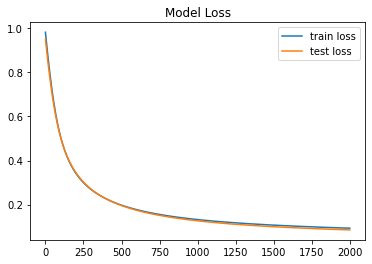

In [21]:
# visualise the test and train loss
plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.title('Model Loss')

Calculate the backward over the validation set

In [22]:
with torch.no_grad():
  output_train = model(X_train)
  output_train = (output_train.numpy() > 0)

  train_acc = np.mean(y_train.numpy() == output_train)

  output_test = model(X_test)
  output_test = (output_test.numpy() > 0)
  
  test_acc = np.mean(y_test.numpy() == output_test)

In [23]:
print ('Train accuracy is: ' + str(train_acc))

Train accuracy is: 0.9773869346733668


In [24]:
print ('Test accuracy is: ' + str(train_acc))

Test accuracy is: 0.9773869346733668
